<a href="https://colab.research.google.com/github/prakhar9998/Malaria-Cell-Detection/blob/master/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 96% 325M/337M [00:02<00:00, 149MB/s]
100% 337M/337M [00:02<00:00, 140MB/s]


In [7]:
!ls

cell-images-for-detecting-malaria.zip  sample_data


In [8]:
!unzip cell-images-for-detecting-malaria

Archive:  cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: cell_images/Parasitized/C

In [9]:
!ls

cell_images  cell-images-for-detecting-malaria.zip  sample_data


In [10]:
!cd cell_images
!ls

cell_images  cell-images-for-detecting-malaria.zip  sample_data


In [13]:
!ls cell_images/

Parasitized  Uninfected


In [14]:
!ls cell_images/Parasitized

C100P61ThinF_IMG_20150918_144104_cell_162.png
C100P61ThinF_IMG_20150918_144104_cell_163.png
C100P61ThinF_IMG_20150918_144104_cell_164.png
C100P61ThinF_IMG_20150918_144104_cell_165.png
C100P61ThinF_IMG_20150918_144104_cell_166.png
C100P61ThinF_IMG_20150918_144104_cell_167.png
C100P61ThinF_IMG_20150918_144104_cell_168.png
C100P61ThinF_IMG_20150918_144104_cell_169.png
C100P61ThinF_IMG_20150918_144104_cell_170.png
C100P61ThinF_IMG_20150918_144104_cell_171.png
C100P61ThinF_IMG_20150918_144348_cell_138.png
C100P61ThinF_IMG_20150918_144348_cell_139.png
C100P61ThinF_IMG_20150918_144348_cell_140.png
C100P61ThinF_IMG_20150918_144348_cell_141.png
C100P61ThinF_IMG_20150918_144348_cell_142.png
C100P61ThinF_IMG_20150918_144348_cell_143.png
C100P61ThinF_IMG_20150918_144348_cell_144.png
C100P61ThinF_IMG_20150918_144823_cell_157.png
C100P61ThinF_IMG_20150918_144823_cell_158.png
C100P61ThinF_IMG_20150918_144823_cell_159.png
C100P61ThinF_IMG_20150918_144823_cell_160.png
C100P61ThinF_IMG_20150918_144823_c

In [15]:
!ls cell_images/Uninfected

C100P61ThinF_IMG_20150918_144104_cell_128.png
C100P61ThinF_IMG_20150918_144104_cell_131.png
C100P61ThinF_IMG_20150918_144104_cell_144.png
C100P61ThinF_IMG_20150918_144104_cell_21.png
C100P61ThinF_IMG_20150918_144104_cell_25.png
C100P61ThinF_IMG_20150918_144104_cell_34.png
C100P61ThinF_IMG_20150918_144104_cell_48.png
C100P61ThinF_IMG_20150918_144104_cell_65.png
C100P61ThinF_IMG_20150918_144348_cell_108.png
C100P61ThinF_IMG_20150918_144348_cell_120.png
C100P61ThinF_IMG_20150918_144348_cell_125.png
C100P61ThinF_IMG_20150918_144348_cell_131.png
C100P61ThinF_IMG_20150918_144348_cell_25.png
C100P61ThinF_IMG_20150918_144348_cell_2.png
C100P61ThinF_IMG_20150918_144348_cell_40.png
C100P61ThinF_IMG_20150918_144348_cell_71.png
C100P61ThinF_IMG_20150918_144823_cell_126.png
C100P61ThinF_IMG_20150918_144823_cell_127.png
C100P61ThinF_IMG_20150918_144823_cell_139.png
C100P61ThinF_IMG_20150918_144823_cell_142.png
C100P61ThinF_IMG_20150918_144823_cell_151.png
C100P61ThinF_IMG_20150918_144823_cell_21.png

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import kaggle

import tensorflow as tf

import cv2
import os

In [20]:
print(os.listdir("cell_images/"))

['Parasitized', 'Uninfected']


In [0]:
import glob
infected = glob.glob("cell_images/Parasitized/*.png")
uninfected = glob.glob("cell_images/Uninfected/*.png")

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


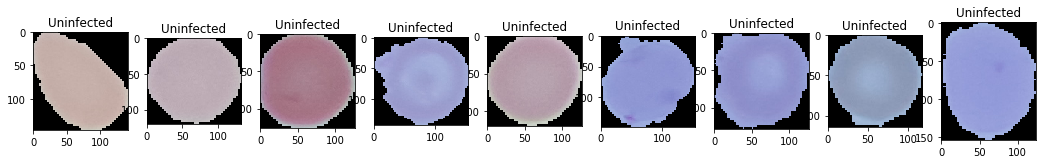

In [41]:
plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(1, 10, i)
    rand = np.random.randint(200)
    plt.imshow(cv2.imread(infected[rand]))
    plt.title("Infected")

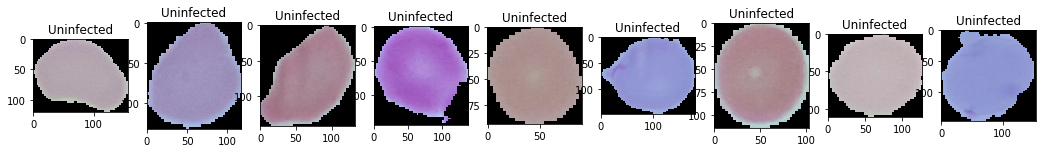

In [42]:
plt.figure(figsize=(20, 20))
for i in range(1, 10):
    plt.subplot(1, 10, i)
    rand = np.random.randint(200)
    plt.imshow(cv2.imread(uninfected[rand]))
    plt.title("Uninfected")

In [0]:
img_array = []
labels = []

for i in infected:
    image = cv2.imread(i)
    img_resize = cv2.resize(image, (50, 50))
    img_array.append(img_resize)
    labels.append(1)
    
for i in uninfected:
    image = cv2.imread(i)
    img_resize = cv2.resize(image, (50, 50))
    img_array.append(img_resize)
    labels.append(i)

In [55]:
img_array = np.array(img_array)
labels = np.array(labels)
print(image_arr.shape, labels.shape)

(27558, 50, 50, 3) (27558,)


In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img_array, labels = shuffle(img_array, labels, random_state=77)

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2, random_state=77)

In [58]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22046, 50, 50, 3) (5512, 50, 50, 3)
(22046,) (5512,)


In [0]:
from keras.preprocessing import ImageDataGenerator

datagen = ImageDataGenerator(
)